In [1]:
import random 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 
import matplotlib.pyplot as plt  
import warnings            
warnings.filterwarnings("ignore") 

In [2]:
import pandas as pd
# pełny zbiór danych
train = pd.read_csv('train_X.csv')
test = pd.read_csv('test_X.csv')
print(train.shape, test.shape)

(7767, 562) (3162, 562)


In [4]:
file=open("activity_labels.txt")
print(file.read())
file.close()


1 WALKING           
2 WALKING_UPSTAIRS  
3 WALKING_DOWNSTAIRS
4 SITTING           
5 STANDING          
6 LAYING            
7 STAND_TO_SIT      
8 SIT_TO_STAND      
9 SIT_TO_LIE        
10 LIE_TO_SIT        
11 STAND_TO_LIE      
12 LIE_TO_STAND   


In [5]:
x_train = train
x_test = test

In [6]:
# dane tylko dotyczące aktywności - aktywności zakodowane liczbowo
y_train = pd.read_csv('train_Y.csv')
y_train

,Unnamed: 0,activity
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
...,...,...
7762,7762,2
7763,7763,2
7764,7764,2
7765,7765,2


In [7]:
y_test = pd.read_csv('test_Y.csv')
y_test

,Unnamed: 0,activity
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
...,...,...
3157,3157,2
3158,3158,2
3159,3159,2
3160,3160,2


In [10]:
# PCA dla całego zbioru treningowego

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#normalizacja
df = StandardScaler().fit_transform(x_train)

pca = PCA()
X_pca_train = pca.fit_transform(df)

In [11]:
pca.explained_variance_ratio_[:10]

array([0.48147493, 0.08088558, 0.03190356, 0.02433187, 0.01807353,
       0.01740658, 0.01366546, 0.01276691, 0.01141915, 0.00968529])

In [12]:
import numpy as np
represent=np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
print(represent)

[48.15 56.24 59.43 61.86 63.67 65.41 66.78 68.06 69.2  70.17 71.06 71.88
 72.66 73.35 74.01 74.63 75.24 75.83 76.4  76.94 77.47 77.98 78.47 78.94
 79.4  79.85 80.27 80.69 81.09 81.47 81.85 82.21 82.56 82.91 83.25 83.58
 83.89 84.2  84.5  84.78 85.06 85.33 85.6  85.86 86.11 86.35 86.59 86.82
 87.04 87.26 87.48 87.7  87.91 88.12 88.32 88.52 88.71 88.9  89.09 89.28
 89.46 89.64 89.82 89.99 90.16 90.33 90.49 90.65 90.81 90.97 91.13 91.29
 91.44 91.59 91.73 91.87 92.01 92.15 92.28 92.41 92.54 92.67 92.8  92.92
 93.04 93.16 93.28 93.4  93.52 93.63 93.74 93.85 93.96 94.07 94.18 94.28
 94.38 94.48 94.58 94.68 94.78 94.87 94.96 95.05 95.14 95.23 95.32 95.41
 95.49 95.57 95.65 95.73 95.81 95.89 95.97 96.04 96.11 96.18 96.25 96.32
 96.39 96.46 96.53 96.6  96.66 96.72 96.78 96.84 96.9  96.96 97.02 97.08
 97.14 97.19 97.24 97.29 97.34 97.39 97.44 97.49 97.54 97.59 97.64 97.69
 97.74 97.79 97.83 97.87 97.91 97.95 97.99 98.03 98.07 98.11 98.15 98.19
 98.23 98.27 98.31 98.35 98.39 98.43 98.47 98.5  98

In [13]:
# PCA dla zbioru testowego
df_test = StandardScaler().fit_transform(x_test)

pca_test = PCA()
X_pca_test = pca_test.fit_transform(df_test)



In [14]:
represent=np.cumsum(np.round(pca_test.explained_variance_ratio_, decimals = 4)*100)
print(represent)



[47.96 55.42 58.34 60.82 62.74 64.47 65.82 67.12 68.27 69.28 70.23 71.08
 71.92 72.72 73.43 74.1  74.75 75.38 75.98 76.55 77.11 77.66 78.2  78.7
 79.19 79.66 80.1  80.54 80.97 81.37 81.76 82.14 82.5  82.85 83.2  83.54
 83.87 84.19 84.51 84.82 85.12 85.41 85.69 85.96 86.22 86.48 86.73 86.97
 87.21 87.44 87.66 87.88 88.1  88.31 88.52 88.73 88.93 89.13 89.33 89.52
 89.71 89.89 90.07 90.25 90.42 90.59 90.76 90.92 91.08 91.24 91.4  91.56
 91.71 91.86 92.   92.14 92.28 92.42 92.56 92.69 92.82 92.95 93.08 93.2
 93.32 93.44 93.56 93.67 93.78 93.89 94.   94.1  94.2  94.3  94.4  94.5
 94.6  94.7  94.8  94.89 94.98 95.07 95.16 95.25 95.34 95.43 95.51 95.59
 95.67 95.75 95.83 95.91 95.99 96.06 96.13 96.2  96.27 96.34 96.41 96.48
 96.55 96.61 96.67 96.73 96.79 96.85 96.91 96.97 97.03 97.09 97.15 97.21
 97.26 97.31 97.36 97.41 97.46 97.51 97.56 97.61 97.66 97.71 97.76 97.8
 97.84 97.88 97.92 97.96 98.   98.04 98.08 98.12 98.16 98.2  98.24 98.28
 98.32 98.36 98.4  98.43 98.46 98.49 98.52 98.55 98.58 

In [16]:
df=x_train

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
X= pca.fit_transform(df)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans
k_fit = kmeans.fit(X)
k_fit.n_clusters
k_fit.cluster_centers_
k_fit.labels_



array([2, 2, 2, ..., 0, 0, 0])

In [20]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(X)
kumeler = k_fit.labels_



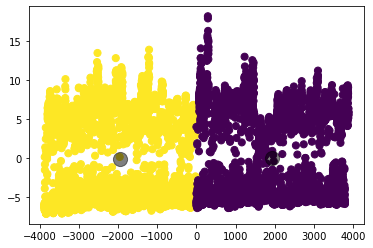

In [21]:
plt.scatter(X[:,0], X[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);



# KMeans, K-fold i KNN

Algorytm K-means

    + Jest prostym algorytmem do podziału danych
    + Nadaje się do przeskalowanych danych, które są ułożone w zwartą formę
    + Słabo działa w przypadku nieprzeskalowanych danych lub danych sferycznych
    
  
 Algorytm DBSCAN
 
     + dla każdego elementu zbioru algorytm liczy elementy w sąsiedztwie epsylonowym gdzie $\epsilon$ jest hiperparametrem
     + nie ma metody predict
     + działa dobrze na danych gęsto rozmieszczonych z wyraźną separacją między klastrami
     + pozwala odsiać anomalie
     
 KNN
 
     + losowanie k punktów startowych ("centroidów")
     + przyporządkowanie wszystkich obserwacji do najbliższego centroidu - wg odległości euklidesowej
     + wyznaczenie nowego centroidu dla każdej z grup
     + małe k --> mniejsze obciążenie i większą wariancję estymatora
     + duże k --> większe obciążenie i mniejszą wariancję estymatora
     + najlepiej stosować na przeskalowanych danych i dla k nieprzystego
     + zalety: szybkość i dobre wyniki dla większości problemów
     + wady: konieczność podania liczby grup, wrażliwość na dobóe punktów startowych, wrażliwość na odberwacje odstające


